In [1]:
import pandas as pd

In [7]:
df = pd.read_clipboard().applymap(lambda x:str(x).replace('%',''))

In [8]:
df.head()

,region,value
0,AK,0.12
1,AL,0.00
2,AR,0.07
3,AZ,0.11
4,CA,0.17


In [9]:
df.dtypes

region    object
value     object
dtype: object

In [10]:
df.value = df.value.astype(float)

In [11]:
df.dtypes

region     object
value     float64
dtype: object

## Choroplethr requires state name, not state code.  So created a dict to map code to name.

In [12]:
state_code_2_name = {
    'AK':'alaska',
    'AL':'alabama',
    'AR':'arkansas',
    'AZ':'arizona',
    'CA':'california',
    'CO':'colorado',
    'CT':'connecticut',
    'DC':'district of colunbia',
    'DE':'delaware',
    'FL':'florida',
    'GA':'georgia',
    'HI':'hawaii',
    'IA':'iowa',
    'ID':'idaho',
    'IL':'illinois',
    'IN':'indiana',
    'KS':'kansas',
    'KY':'kentucky',
    'LA':'louisiana',
    'MA':'massachusetts',
    'MD':'maryland',
    'ME':'maine',
    'MI':'michigan',
    'MN':'minnesota',
    'MO':'missouri',
    'MS':'mississippi',
    'MT':'montana',
    'NC':'north carolina',
    'ND':'north dakota',
    'NE':'nebraska',
    'NH':'new hampshire',
    'NJ':'new jersey',
    'NM':'new mexico',
    'NV':'nevada',
    'NY':'new york',
    'OH':'ohio',
    'OK':'oklahoma',
    'OR':'oregon',
    'PA':'pennsylvania',
    'RI':'rhode island',
    'SC':'south carolina',
    'SD':'south dakota',
    'TN':'tennessee',
    'TX':'texas',
    'UT':'utah',
    'VA':'virginia',
    'VT':'vermont',
    'WA':'washington',
    'WI':'wisconsin',
    'WV':'west virginia',
    'WY':'wyoming'
}

In [13]:
df.region = df.region.map(state_code_2_name)

In [14]:
df

,region,value
0,alaska,0.12
1,alabama,0.00
2,arkansas,0.07
3,arizona,0.11
4,california,0.17
5,colorado,0.25
6,connecticut,0.30
7,district of colunbia,0.20
8,delaware,0.18
9,florida,0.50


In [15]:
%load_ext rpy2.ipython

In [16]:
%R -i df

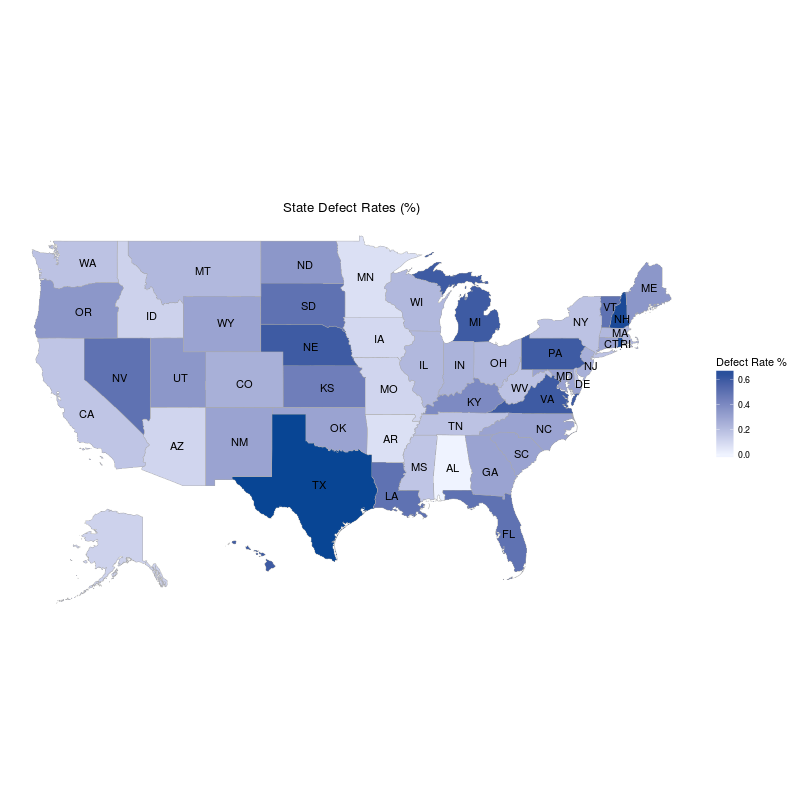

In [18]:
%%R -w 800 -h 800 -u px
library(choroplethr)
choropleth_data = as.data.frame(df)
state_choropleth(choropleth_data,
                 title      = "State Defect Rates (%)",
                 legend     = "Defect Rate %",
                 num_colors = 1)